In [1]:
import sys

from src.dataset import X_TIME, TIME_STEP
from src.models import optimal_model_builder_ch_2_11

PWD = '../../..'
sys.path.append(PWD)

import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf

tf.get_logger().setLevel('ERROR')

from sklearn.model_selection import train_test_split
from IPython.display import display, HTML

from src.cfd import CFD
from src.gauss_hist import get_gauss_stats
from src.network_utils import plot_difference_hist, compare_results

In [2]:
N_JOBS = 16

DATASET_PATH = PWD + '/data/dataset/dataset.pkl'

PRINT_PCOV = False

N_BASELINE = 8

LR = 0.01
ES_MIN_DELTA = 0.01

N_EPOCHS = 3000
BATCH_SIZE = 2048
LOSS_WEIGHT = 1000

OPTIMAL_CFD_THRESHOLDS_TRAIN_DATA_PATH = PWD + '/data/tmp/many_channels_tests/optimal_cfd_thresholds_train_data.pkl'

TEST_SIZE = 0.2
TRAIN_TEST_SPLIT_RANDOM_STATE = 42

In [3]:
with open(DATASET_PATH, 'rb') as file:
    dataset = pickle.load(file)

# Utils

In [4]:
def model_predict(model: tf.keras.Model, X: np.ndarray):
    Y_heatmap_pred = model.predict(X, batch_size=4096)

    y_pred = np.empty(Y_heatmap_pred.shape[0])
    for i, y in enumerate(Y_heatmap_pred):
        _, y_pred[i], _, _ = get_gauss_stats(X_TIME, y, a_0=1, std_0=1. * TIME_STEP)

    return y_pred

In [5]:
def load_model(model, name, path_component='many_channels_tests/trained_separately', root=PWD):
    model.load_weights(f'{root}/data/model_weights/{path_component}/{name}/weights')
    history = pd.read_csv(f'{root}/data/model_weights/{path_component}/{name}/loss_log.csv')

    return history

# Load optimal CFD thresholds

In [6]:
with open(OPTIMAL_CFD_THRESHOLDS_TRAIN_DATA_PATH, 'rb') as file:
    optimal_cfd_thresholds = pickle.load(file)

print('Optimal thresholds:')
for (plane, channel), threshold in optimal_cfd_thresholds.items():
    print(f'({plane:>1}, {channel:>2}): {threshold:0.3f}')

Optimal thresholds:
(1,  2): 0.180
(1, 11): 0.185
(2,  2): 0.220
(2, 11): 0.145
(3,  2): 0.130
(3, 11): 0.175


# Test

Processing p=1, ch=2...
1/1 [==============================] - 2s 2s/step


C:\Users\MatiX\miniconda3\envs\cern-ml\lib\site-packages\statsmodels\stats\weightstats.py:196: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.var)


       CFD: 76.08 ps
   optimal: 67.70 ps (improvement: 11.01 %)
Processing p=1, ch=11...
2/2 [==============================] - 0s 23ms/step
       CFD: 88.03 ps
   optimal: 86.36 ps (improvement: 1.90 %)
Processing p=2, ch=2...
1/1 [==============================] - 0s 36ms/step
       CFD: 80.13 ps
   optimal: 76.60 ps (improvement: 4.41 %)
Processing p=2, ch=11...
2/2 [==============================] - 0s 23ms/step
       CFD: 90.39 ps
   optimal: 92.18 ps (improvement: -1.99 %)
Processing p=3, ch=2...
1/1 [==============================] - 0s 127ms/step
       CFD: 86.67 ps
   optimal: 82.61 ps (improvement: 4.68 %)
Processing p=3, ch=11...
2/2 [==============================] - 0s 115ms/step
       CFD: 115.86 ps
   optimal: 128.77 ps (improvement: -11.15 %)


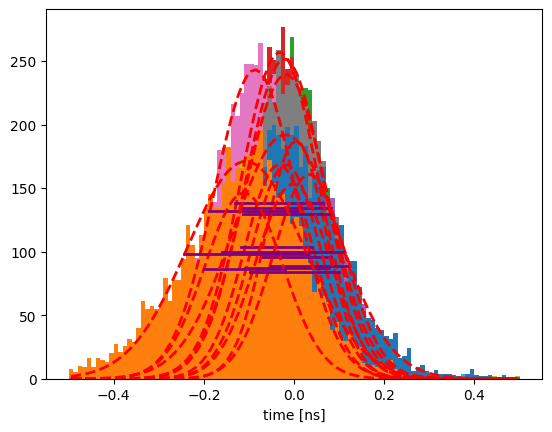

Processing p=1, ch=2...
1/1 [==============================] - 0s 156ms/step


C:\Users\MatiX\miniconda3\envs\cern-ml\lib\site-packages\statsmodels\stats\weightstats.py:196: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.var)


       CFD: 76.08 ps
   optimal: 72.65 ps (improvement: 4.51 %)
Processing p=1, ch=11...
2/2 [==============================] - 0s 71ms/step
       CFD: 88.03 ps
   optimal: 80.22 ps (improvement: 8.87 %)
Processing p=2, ch=2...
1/1 [==============================] - 0s 19ms/step
       CFD: 80.13 ps
   optimal: 74.10 ps (improvement: 7.53 %)
Processing p=2, ch=11...
2/2 [==============================] - 0s 121ms/step
       CFD: 90.39 ps
   optimal: 87.95 ps (improvement: 2.70 %)
Processing p=3, ch=2...
1/1 [==============================] - 0s 14ms/step
       CFD: 86.67 ps
   optimal: 90.89 ps (improvement: -4.87 %)
Processing p=3, ch=11...
2/2 [==============================] - 0s 15ms/step
       CFD: 115.86 ps
   optimal: 104.87 ps (improvement: 9.49 %)


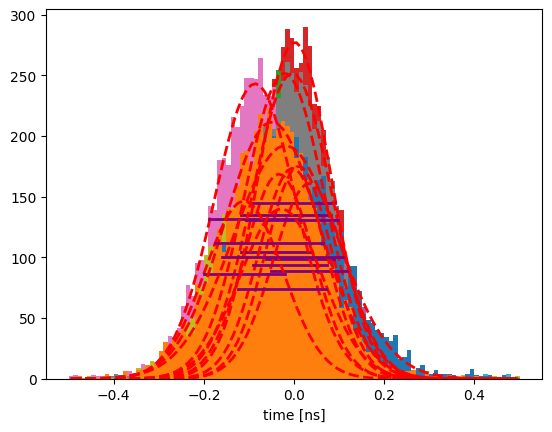

Processing p=1, ch=2...
1/1 [==============================] - 0s 145ms/step
       CFD: 76.08 ps
   optimal: 72.37 ps (improvement: 4.87 %)
Processing p=1, ch=11...
2/2 [==============================] - 0s 62ms/step


C:\Users\MatiX\miniconda3\envs\cern-ml\lib\site-packages\statsmodels\stats\weightstats.py:196: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.var)


       CFD: 88.03 ps
   optimal: 82.44 ps (improvement: 6.36 %)
Processing p=2, ch=2...
1/1 [==============================] - 0s 13ms/step
       CFD: 80.13 ps
   optimal: 69.42 ps (improvement: 13.36 %)
Processing p=2, ch=11...
2/2 [==============================] - 0s 34ms/step
       CFD: 90.39 ps
   optimal: 87.98 ps (improvement: 2.67 %)
Processing p=3, ch=2...
1/1 [==============================] - 0s 14ms/step
       CFD: 86.67 ps
   optimal: 83.69 ps (improvement: 3.44 %)
Processing p=3, ch=11...
2/2 [==============================] - 0s 64ms/step
       CFD: 115.86 ps
   optimal: 107.89 ps (improvement: 6.88 %)


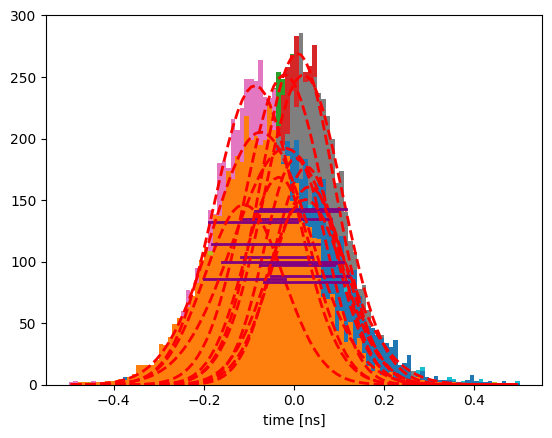

Processing p=1, ch=2...
1/1 [==============================] - 0s 144ms/step
       CFD: 76.08 ps
   optimal: 71.53 ps (improvement: 5.98 %)
Processing p=1, ch=11...
2/2 [==============================] - 0s 3ms/step
       CFD: 88.03 ps
   optimal: 85.07 ps (improvement: 3.37 %)
Processing p=2, ch=2...
1/1 [==============================] - 0s 11ms/step
       CFD: 80.13 ps
   optimal: 75.26 ps (improvement: 6.08 %)
Processing p=2, ch=11...
2/2 [==============================] - 0s 7ms/step
       CFD: 90.39 ps
   optimal: 85.02 ps (improvement: 5.94 %)
Processing p=3, ch=2...
1/1 [==============================] - 0s 13ms/step
       CFD: 86.67 ps
   optimal: 82.70 ps (improvement: 4.58 %)
Processing p=3, ch=11...
2/2 [==============================] - 0s 53ms/step


C:\Users\MatiX\miniconda3\envs\cern-ml\lib\site-packages\statsmodels\stats\weightstats.py:196: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.var)


       CFD: 115.86 ps
   optimal: 100.20 ps (improvement: 13.51 %)


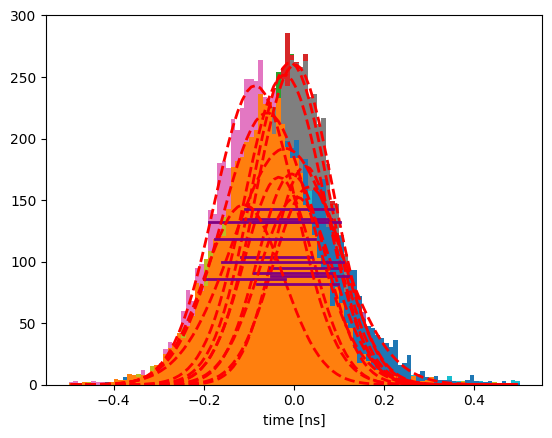

Processing p=1, ch=2...
1/1 [==============================] - 0s 142ms/step
       CFD: 76.08 ps
   optimal: 71.16 ps (improvement: 6.46 %)
Processing p=1, ch=11...
2/2 [==============================] - 0s 27ms/step
       CFD: 88.03 ps
   optimal: 107.20 ps (improvement: -21.78 %)
Processing p=2, ch=2...
1/1 [==============================] - 0s 11ms/step
       CFD: 80.13 ps
   optimal: 87.09 ps (improvement: -8.69 %)
Processing p=2, ch=11...
2/2 [==============================] - 0s 35ms/step
       CFD: 90.39 ps
   optimal: 95.04 ps (improvement: -5.14 %)
Processing p=3, ch=2...
1/1 [==============================] - 0s 12ms/step
       CFD: 86.67 ps
   optimal: 76.14 ps (improvement: 12.14 %)
Processing p=3, ch=11...
2/2 [==============================] - 0s 66ms/step
       CFD: 115.86 ps
   optimal: 127.69 ps (improvement: -10.21 %)


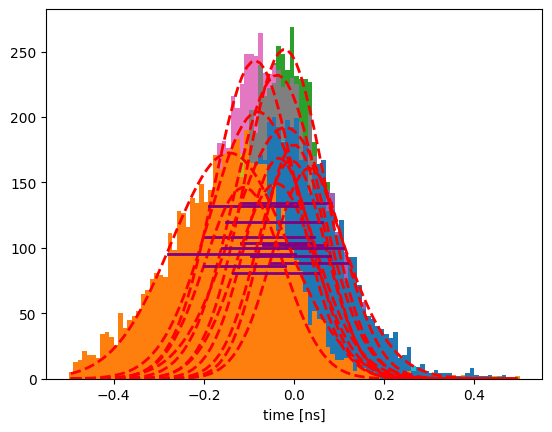

Processing p=1, ch=2...
1/1 [==============================] - 0s 154ms/step


C:\Users\MatiX\miniconda3\envs\cern-ml\lib\site-packages\statsmodels\stats\weightstats.py:196: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.var)


       CFD: 76.08 ps
   optimal: 72.26 ps (improvement: 5.01 %)
Processing p=1, ch=11...
2/2 [==============================] - 0s 3ms/step
       CFD: 88.03 ps
   optimal: 86.02 ps (improvement: 2.28 %)
Processing p=2, ch=2...
1/1 [==============================] - 0s 12ms/step
       CFD: 80.13 ps
   optimal: 76.85 ps (improvement: 4.10 %)
Processing p=2, ch=11...
2/2 [==============================] - 0s 34ms/step
       CFD: 90.39 ps
   optimal: 86.85 ps (improvement: 3.91 %)
Processing p=3, ch=2...
1/1 [==============================] - 0s 12ms/step
       CFD: 86.67 ps
   optimal: 87.07 ps (improvement: -0.46 %)
Processing p=3, ch=11...
2/2 [==============================] - 0s 68ms/step
       CFD: 115.86 ps
   optimal: 94.80 ps (improvement: 18.18 %)


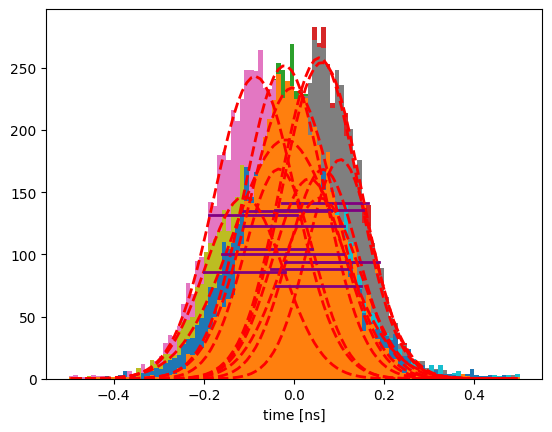

In [7]:
results = {}
for model_plane, model_channel in list(dataset.keys()):
    display(HTML(f'<h3>Loading model p={model_plane}, ch={model_channel}...</h3>'))
    model = optimal_model_builder_ch_2_11()
    load_model(model, f'optimal_{model_plane}_{model_channel}')

    this_results = {}
    for (plane, channel), (all_X, all_y) in dataset.items():
        print(f'Processing p={plane}, ch={channel}...')
        _, X_test, _, y_test = train_test_split(all_X, all_y, test_size=TEST_SIZE,
                                                random_state=TRAIN_TEST_SPLIT_RANDOM_STATE)

        cfd = CFD(n_baseline=N_BASELINE, threshold=optimal_cfd_thresholds[(plane, channel)])
        y_pred_cfd = cfd.predict(X_TIME, X_test)
        std_cfd, _, _ = plot_difference_hist(y_test, y_pred_cfd, show=False, close=False)

        y_pred_model = model_predict(model, X_test)
        std_model, _, _ = plot_difference_hist(y_test, y_pred_model, show=False, close=False)

        compare_results([std_model], ["optimal"], std_cfd)
        this_results[(plane, channel)] = (std_cfd, std_model, 1 - std_model / std_cfd)  # cfd, model, improv

    plt.show()
    results[(model_plane, model_channel)] = this_results

# Analyse results

In [8]:
# Check that the order is the same
assert list(results.keys()) == sorted(results.keys())
for x in results.values():
    assert list(x.keys()) == sorted(x.keys())

row_names = [str(key) for key in results.keys()]
col_names = [str(key) for key in list(results.values())[0].keys()]

In [9]:
improv_data = np.array([list(str(f'{x[2] * 100:0.2f} %') for x in r.values()) for r in results.values()])

In [10]:
df = pd.DataFrame(improv_data, index=row_names, columns=col_names)
df.index.name = 'trained on / tested on'
df

,"(1, 2)","(1, 11)","(2, 2)","(2, 11)","(3, 2)","(3, 11)"
trained on / tested on,,,,,,
"(1, 2)",11.01 %,1.90 %,4.41 %,-1.99 %,4.68 %,-11.15 %
"(1, 11)",4.51 %,8.87 %,7.53 %,2.70 %,-4.87 %,9.49 %
"(2, 2)",4.87 %,6.36 %,13.36 %,2.67 %,3.44 %,6.88 %
"(2, 11)",5.98 %,3.37 %,6.08 %,5.94 %,4.58 %,13.51 %
"(3, 2)",6.46 %,-21.78 %,-8.69 %,-5.14 %,12.14 %,-10.21 %
"(3, 11)",5.01 %,2.28 %,4.10 %,3.91 %,-0.46 %,18.18 %
